<a href="https://colab.research.google.com/github/Prakarsha01/EpilipticSeizurePredeiction/blob/main/EpilepticSeizurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports and installations**

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from imblearn.over_sampling import SMOTE as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

#**Data Preprocessing**

In [ ]:
data = pd.read_csv('/content/data (1).csv')
data

,column_a,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x170,x171,x172,x173,x174,x175,x176,x177,x178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
EEG_values = data.values[:,1:-1]

In [ ]:
EEG_values

array([[135, 190, 229, ..., -116, -83, -51],
       [386, 382, 356, ..., 154, 143, 129],
       [-32, -39, -47, ..., -35, -35, -36],
       ...,
       [14, 6, -13, ..., -2, -1, -8],
       [-40, -25, -9, ..., 68, 59, 55],
       [29, 41, 57, ..., -2, 2, 20]], dtype=object)

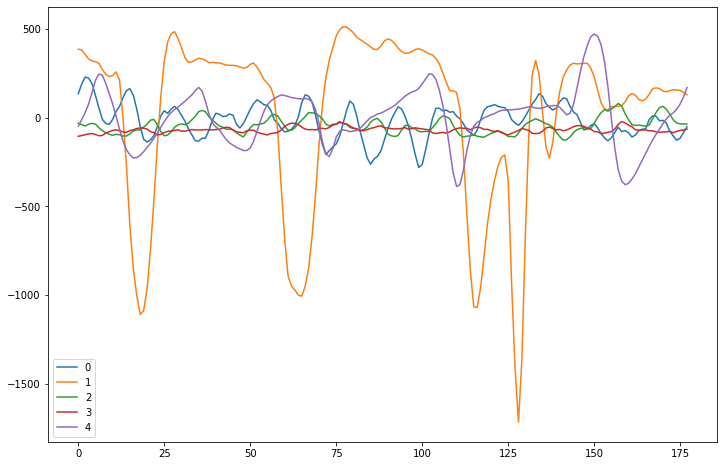

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(EEG_values[0,:],label='0')
plt.plot(EEG_values[1,:],label='1')
plt.plot(EEG_values[2,:],label='2')
plt.plot(EEG_values[3,:],label='3')
plt.plot(EEG_values[11496,:],label='4')
plt.legend()
plt.show()

In [ ]:
Target_values = np.array(data['y'])

In [ ]:
for i in range(len(Target_values)):
    if Target_values[i] !=1:
        Target_values[i]=0
Target_values        

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
Counter(Target_values)

Counter({0: 9200, 1: 2300})

In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(EEG_values, Target_values, test_size=1 - train_ratio,random_state=0)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=0) 


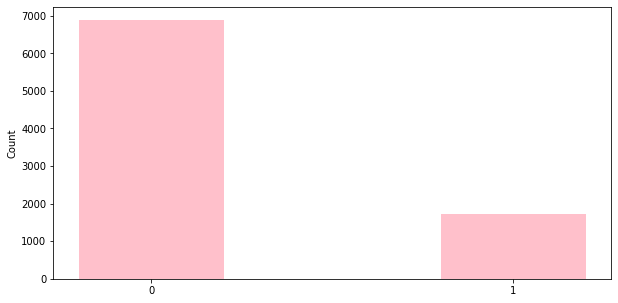

In [ ]:
# creating the dataset
data = {'0':Counter(y_train)[0], '1':Counter(y_train)[1]}
xaxis = list(data.keys())
yaxis = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(xaxis, yaxis, color ='pink',
		width = 0.4)

plt.ylabel("Count")
plt.show()

In [ ]:
#To handle data imbalance
# SMOTE - Synthetic Minority Over-sampling
sm = sm(random_state=2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

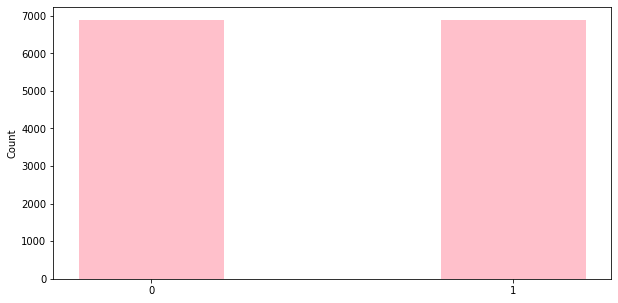

In [ ]:
# creating the dataset
data = {'0':Counter(y_train_res)[0], '1':Counter(y_train_res)[1]}
xaxis = list(data.keys())
yaxis = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(xaxis, yaxis, color ='pink',
		width = 0.4)

plt.ylabel("Count")
plt.show()

#**Training**

In [ ]:
#Logistic Regression
lr=LogisticRegression(max_iter=8000)
lr.fit(X_train_res, y_train_res)

print("score on train: "+ str(lr.score(X_train_res, y_train_res)))
print("score on validation: " + str(lr.score(x_val, y_val)))
print("score on test: " + str(lr.score(x_test, y_test)))

score on train: 0.649753193960511
score on validation: 0.6707246376811594
score on test: 0.6939130434782609


In [ ]:
#KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train_res, y_train_res)

print("score on train: "+ str(knn.score(X_train_res, y_train_res)))
print("score on validation: " + str(knn.score(x_val, y_val)))
print("score on test: " + str(knn.score(x_test, y_test)))

score on train: 0.9957897793263647
score on validation: 0.9605797101449275
score on test: 0.9556521739130435


In [ ]:
#Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res)

print("score on train: " + str(clf.score(X_train_res, y_train_res)))
print("score on validation: " + str(clf.score(x_val, y_val)))
print("score on test: "  + str(clf.score(x_test, y_test)))

score on train: 1.0
score on validation: 0.9107246376811594
score on test: 0.908695652173913


In [ ]:
#Decision Tree Classifier with Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train_res, y_train_res)

print("score on train: "+ str(bg.score(X_train_res, y_train_res)))
print("score on validation: " + str(bg.score(x_val, y_val)))
print("score on test: " + str(bg.score(x_test, y_test)))

score on train: 0.9909262485481998
score on validation: 0.9588405797101449
score on test: 0.9608695652173913


In [ ]:
#Decision Tree Classifier with AdaBoostClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=6),n_estimators=10,learning_rate=0.6)
adb.fit(X_train_res, y_train_res)

print("score on train: "+ str(adb.score(X_train_res, y_train_res)))
print("score on validation: " + str(adb.score(x_val, y_val)))
print("score on test: " + str(adb.score(x_test, y_test)))


score on train: 0.9958623693379791
score on validation: 0.9559420289855073
score on test: 0.9530434782608695


In [ ]:
#Random Forest Classifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=80, max_depth=9)
rf.fit(X_train_res, y_train_res)

print("score on train: "+ str(rf.score(X_train_res, y_train_res)))
print("score on validation: " + str(rf.score(x_val, y_val)))
print("score on test: " + str(rf.score(x_test, y_test)))


score on train: 0.9753919860627178
score on validation: 0.967536231884058
score on test: 0.9765217391304348


In [ ]:
y_predicted = rf.predict(x_test)

# **Calculating performance statistics for Random Forest Classifier (Best performing model)**

In [ ]:
matrix = confusion_matrix(y_test, y_predicted)
df_confusion = pd.DataFrame(matrix, index=['Non-Epileptic','Epileptic'],columns=['Non-Epileptic','Epileptic'])

df_confusion

,Non-Epileptic,Epileptic
Non-Epileptic,900,17
Epileptic,10,223


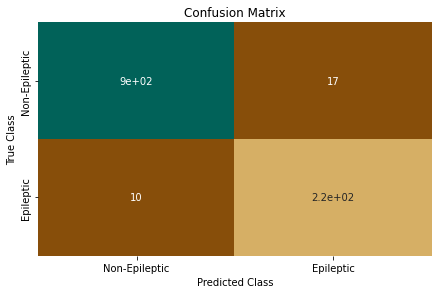

In [ ]:
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()

print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

True Negative (TN) : 900
False Positive (FP): 17
False Negative (FN): 10
True Positive (TP) : 223


## Sensitivity

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
Sensitivity  = float(TP)/(TP+FN)*100
print(f"Sensitivity or TPR: {Sensitivity}%")  
print(f"There is a {Sensitivity}% chance of detecting patients going through epiletic seizure.")

Sensitivity or TPR: 95.70815450643777%
There is a 95.70815450643777% chance of detecting patients going through epiletic seizure.


###Specificity

In [ ]:
# Specificity or true negative rate
Specificity  = float(TN)/(TN+FP)*100
print(f"Specificity or TNR: {Specificity}%") 
print(f"There is a {Specificity}% chance of detecting normal patients are normal.")

Specificity or TNR: 98.14612868047983%
There is a 98.14612868047983% chance of detecting normal patients are normal.


###Positive and negative predictive values

In [ ]:
# Precision or positive predictive value
Precision = float(TP)/(TP+FP)*100
print(f"Precision: {Precision}%")  

Precision: 92.91666666666667%


In [ ]:
# Negative predictive value
NPV = float(TN)/(TN+FN)*100
print(f"Negative Predictive Value: {NPV}%") 

Negative Predictive Value: 98.9010989010989%


### False positive rate


In [ ]:
# Fall out or false positive rate
FPR = float(FP)/(FP+TN)*100
print( f"False Positive Rate: {FPR}%") 
print( f"There is a {FPR}% chance that this positive result is incorrect.")

False Positive Rate: 1.8538713195201746%
There is a 1.8538713195201746% chance that this positive result is incorrect.


### False negative rate

In [ ]:
# False negative rate
FNR = float(FN)/(TP+FN)*100
print(f"False Negative Rate: {FNR}%") 
print(f"There is a {FNR}% chance that this negative result is incorrect.")

False Negative Rate: 4.291845493562231%
There is a 4.291845493562231% chance that this negative result is incorrect.


### False discovery rate

In [ ]:
# False discovery rate
FDR = float(FP)/(TP+FP)*100
print(f"False Discovery Rate: {FDR}%" )

False Discovery Rate: 7.083333333333333%


## **Overall accuracy**


In [ ]:
# Overall accuracy
ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Accuracy: {ACC}%") 

Accuracy: 97.65217391304348%


In [ ]:
print(f"Sensitivity or TPR: {Sensitivity}%")    
print(f"Specificity or TNR: {Specificity}%") 
print(f"Precision: {Precision}%")   
print(f"Negative Predictive Value: {NPV}%")  
print( f"False Positive Rate: {FPR}%") 
print(f"False Negative Rate: {FNR}%")  
print(f"False Discovery Rate: {FDR}%" )
print(f"Accuracy: {ACC}%") 

Sensitivity or TPR: 95.70815450643777%
Specificity or TNR: 98.14612868047983%
Precision: 92.91666666666667%
Negative Predictive Value: 98.9010989010989%
False Positive Rate: 1.8538713195201746%
False Negative Rate: 4.291845493562231%
False Discovery Rate: 7.083333333333333%
Accuracy: 97.65217391304348%



##**Calculating the AUC-ROC Curve**

In [ ]:
print("Validation AUC", roc_auc_score(y_test, y_predicted) )

Validation AUC 0.969271415934588


Figure(432x288)


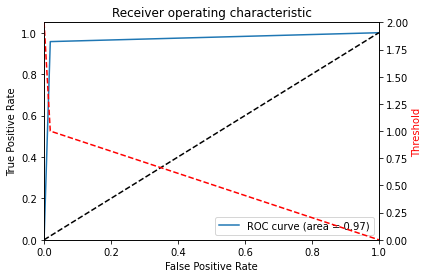

<Figure size 432x288 with 0 Axes>

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

print(plt.figure())